In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import math
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv('red-wine-quality.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [4]:
y=df.quality

In [5]:
X=df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]                         
X=sm.add_constant(X)

In [6]:
X.iloc[:,1:].columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [7]:
est=sm.OLS(y,X).fit()

In [8]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          1.79e-145
Time:                        19:42:05   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652     21.195      1.036      0.300     -19.607      63.538
fixed acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free sulfur dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 方差膨胀系数计算

In [9]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.iloc[:,1:].columns
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.iloc[:,1:].values, i) 
                          for i in range(len(X.iloc[:,1:].columns))] 
  
print(vif_data)

                 feature          VIF
0          fixed acidity    74.452265
1       volatile acidity    17.060026
2            citric acid     9.183495
3         residual sugar     4.662992
4              chlorides     6.554877
5    free sulfur dioxide     6.442682
6   total sulfur dioxide     6.519699
7                density  1479.287209
8                     pH  1070.967685
9              sulphates    21.590621
10               alcohol   124.394866


# 回归诊断

   quality    resids  std_resids    fitted
0        5 -0.032850   -0.050694  5.032850
1        5 -0.137880   -0.212774  5.137880
2        5 -0.209895   -0.323906  5.209895
3        6  0.306142    0.472433  5.693858
4        5 -0.032850   -0.050694  5.032850


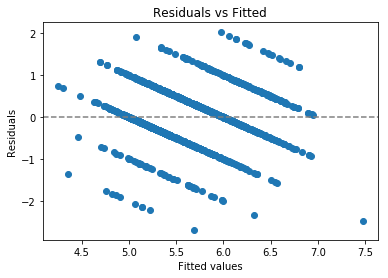

In [19]:
lm = smf.ols(formula = 'quality ~ X', data = df).fit()
results = pd.DataFrame({'quality': y, # y实际值
                        'resids': lm.resid, # 残差
                        'std_resids': lm.resid_pearson, # 方差标准化的残差
                        'fitted': lm.predict() # y预测值
                       })
print(results.head())

# 残差拟合图：横坐标是拟合值，纵坐标是残差。
residsvfitted = plt.plot(results['fitted'], results['resids'],  'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed') # 绘制y=0水平线
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show(residsvfitted)

# 残差QQ图：用来描述残差是否符合正态分布。
qqplot = sm.qqplot(results['std_resids'], line='s')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.title('Normal Q-Q')
plt.show(qqplot)

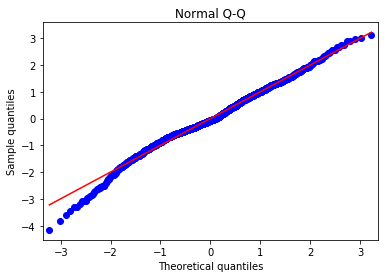

In [20]:
 
# 残差QQ图：用来描述残差是否符合正态分布。
qqplot = sm.qqplot(results['std_resids'], line='s')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.title('Normal Q-Q')
plt.show(qqplot)